<a href="https://colab.research.google.com/github/swetha2348568/ML_assignments/blob/main/2348568_aml_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/drive/MyDrive/data - data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [4]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
df.shape

(4600, 18)

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
numerical_data= df.select_dtypes(include=['int64', 'float64']).columns

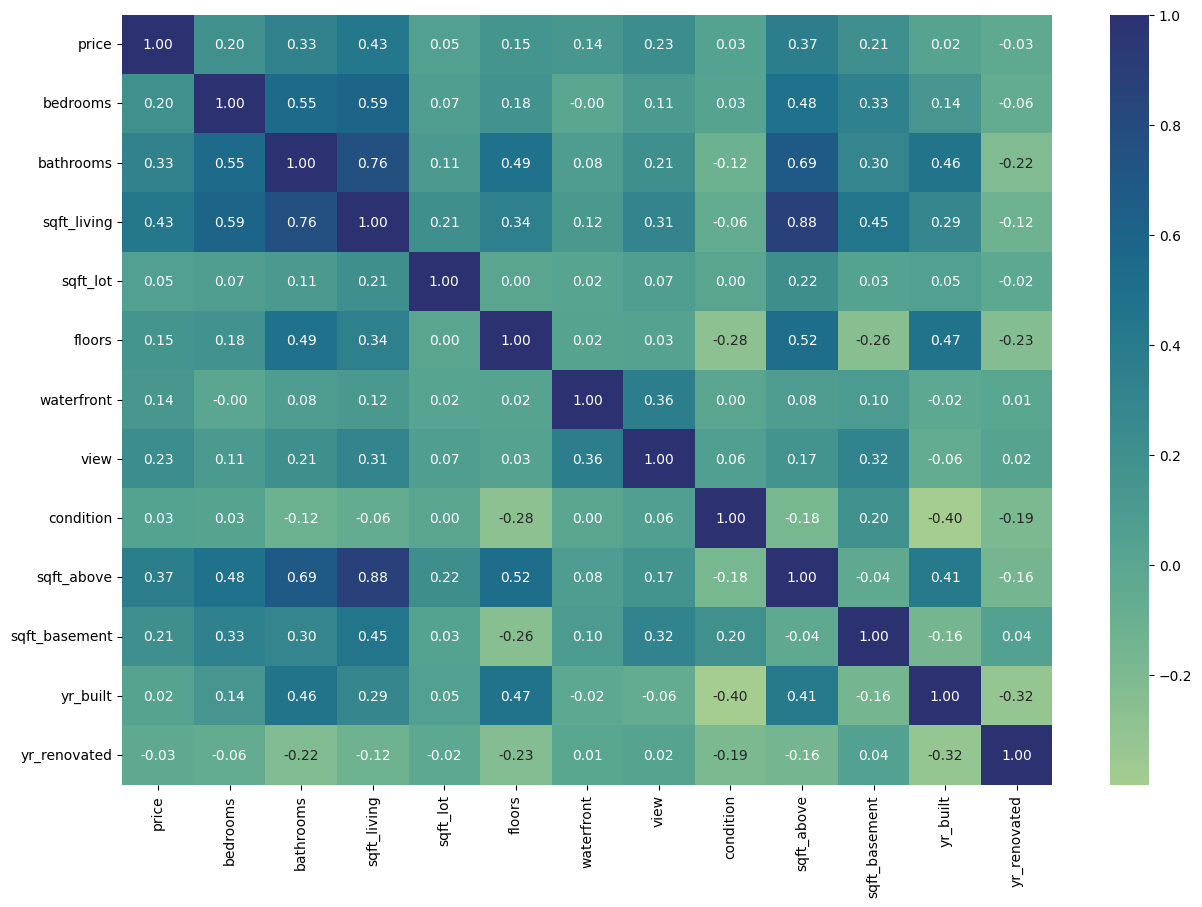

In [31]:
corr_matrix = df[numerical_data].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True,fmt='.2f', cmap='crest')
plt.show()

In [9]:
# Define the number of bins and bin names for 'Year Built' and 'Sqft_Above'
num_bins = 5
bin_labels = ["Very Old", "Old", "Mid-Age", "Newer", "Very New"]

# Bin 'Year Built'
df['Year Built Bin'] = pd.cut(df['yr_built'], bins=num_bins, labels=bin_labels)

# Bin 'Sqft_Above'
df['Sqft Above Bin'] = pd.cut(df['sqft_above'], bins=num_bins, labels=bin_labels)

# Calculate the mean of 'Year Built' and 'Sqft_Above' for each bin
bin_means_year_built = df.groupby('Year Built Bin')['yr_built'].mean()
bin_means_sqft_above = df.groupby('Sqft Above Bin')['sqft_above'].mean()

# Calculate the bin boundaries
bin_boundaries_year_built = df.groupby('Year Built Bin')['yr_built'].min().tolist() + [df['yr_built'].max()]
bin_boundaries_sqft_above = df.groupby('Sqft Above Bin')['sqft_above'].min().tolist() + [df['sqft_above'].max()]

In [10]:
print("Bin Means for Year Built:")
print(bin_means_year_built)

print("Bin Means for Sqft Above:")
print(bin_means_sqft_above)

print("Bin Boundaries for Year Built:")
print(bin_boundaries_year_built)

print("Bin Boundaries for Sqft Above:")
print(bin_boundaries_sqft_above)

Bin Means for Year Built:
Year Built Bin
Very Old    1911.414062
Old         1934.308271
Mid-Age     1957.737024
Newer       1981.212042
Very New    2003.595514
Name: yr_built, dtype: float64
Bin Means for Sqft Above:
Sqft Above Bin
Very Old    1384.617558
Old         2776.695470
Mid-Age     4408.292453
Newer       6435.714286
Very New    8370.000000
Name: sqft_above, dtype: float64
Bin Boundaries for Year Built:
[1900, 1923, 1946, 1969, 1992, 2014]
Bin Boundaries for Sqft Above:
[370, 2180, 3990, 6050, 7680, 9410]


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
scaler = StandardScaler()
df[numerical_data] = scaler.fit_transform(df[numerical_data])


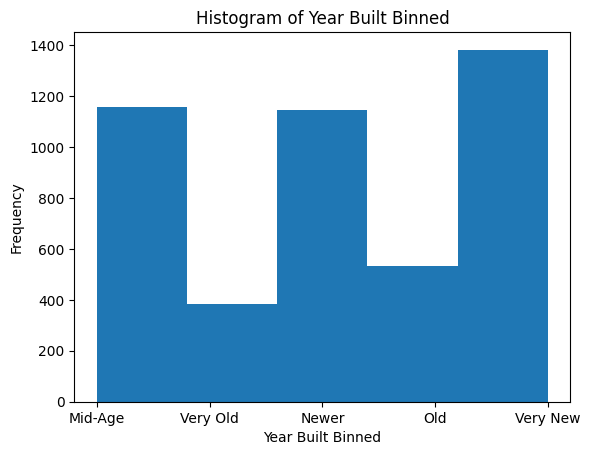

In [15]:
plt.hist(df['Year Built Bin'], bins=5)
plt.xlabel('Year Built Binned')
plt.ylabel('Frequency')
plt.title('Histogram of Year Built Binned')
plt.show()

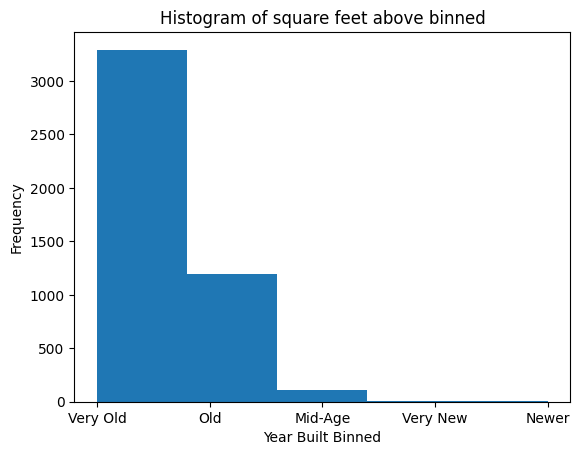

In [16]:
plt.hist(df['Sqft Above Bin'], bins=5)
plt.xlabel('Year Built Binned')
plt.ylabel('Frequency')
plt.title('Histogram of square feet above binned')
plt.show()

In [17]:
min_max_scaler = MinMaxScaler()
min_max_df = pd.DataFrame(min_max_scaler.fit_transform(df[numerical_data]), columns=numerical_data)

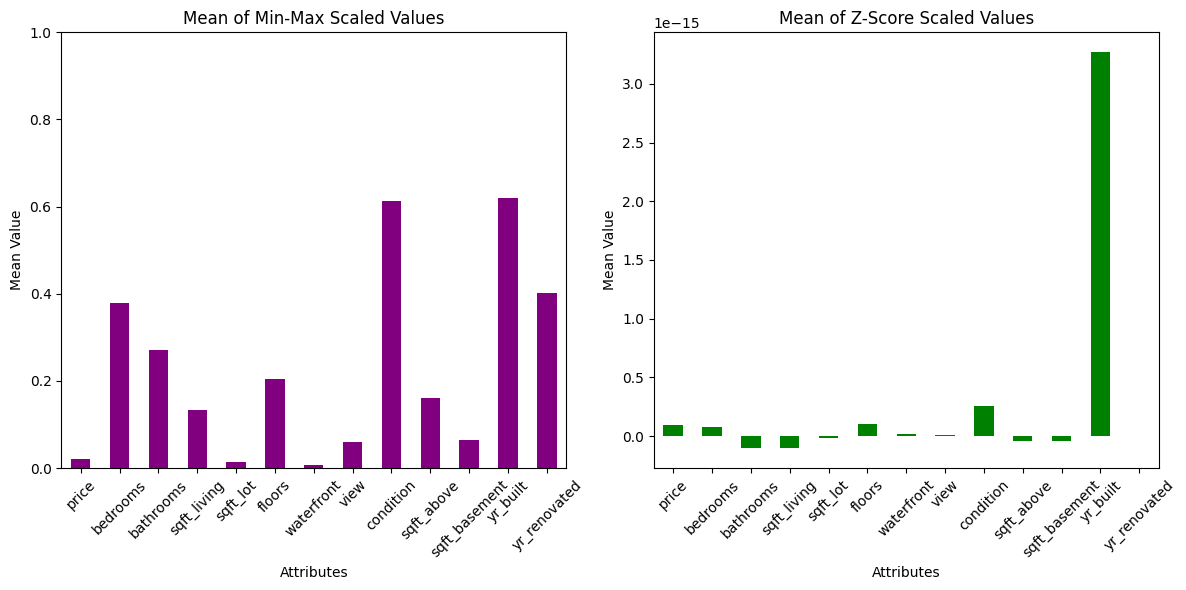

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
min_max_means = min_max_df.mean()
min_max_means.plot(kind='bar', rot=45,color='purple')  # Rotating x-axis labels by 45 degrees
plt.title('Mean of Min-Max Scaled Values')
plt.xlabel('Attributes')
plt.ylabel('Mean Value')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
z_score_means = df[numerical_data].mean()
z_score_means.plot(kind='bar', rot=45,color='green')  # Rotating x-axis labels by 45 degrees
plt.title('Mean of Z-Score Scaled Values')
plt.xlabel('Attributes')
plt.ylabel('Mean Value')

plt.tight_layout()
plt.show()